In [ ]:
!nvidia-smi

Tue Sep 14 07:19:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    72W / 149W |   8441MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Importing libraries

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Activation,Dropout,Conv2D,MaxPool2D
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from keras.applications import mobilenet
from sklearn.metrics import confusion_matrix
from tensorflow.math import confusion_matrix
import seaborn as sns
from keras.models import load_model

# Checking training and testing folders

In [ ]:
for folder in os.listdir('/content/drive/MyDrive/Dataset/Training'):
  print('folder in training set ',folder)

folder in training set  Aliff nabil
folder in training set  Badrul hisham


In [ ]:
for folder in os.listdir('/content/drive/MyDrive/Dataset/Test'):
  print('folder in test set ',folder)

folder in test set  Aliff nabil
folder in test set  Badrul hisham


In [ ]:
test = {}
count = 0
for folder in sorted(os.listdir('/content/drive/MyDrive/Dataset/Training')):
    temp = []
    for files in os.listdir(f'/content/drive/MyDrive/Dataset/Training/{folder}'):
        temp.append(files)
    count += len(temp)
    test[folder] = temp
    print(f"The training {folder} has {len(temp)} images")
print(f"Total images in all folders are {count}")

The training Aliff nabil has 20 images
The training Badrul hisham has 20 images
Total images in all folders are 40


In [ ]:
test = {}
count = 0
for folder in sorted(os.listdir('/content/drive/MyDrive/Dataset/Test')):
    temp = []
    for files in os.listdir(f'/content/drive/MyDrive/Dataset/Test/{folder}'):
        temp.append(files)
    count += len(temp)
    test[folder] = temp
    print(f"The training {folder} has {len(temp)} images")
print(f"Total images in all folders are {count}")

The training Aliff nabil has 10 images
The training Badrul hisham has 10 images
Total images in all folders are 20


# Plot an instance of the image

In [3]:
img_1=cv2.imread('/content/drive/MyDrive/Dataset/Training/Badrul hisham/13265965_10209642914413760_6717882295180455814_n.jpg')
#plt.imshow(img_1)

# Preprocessing the photos

In [ ]:
main_dir='/content/drive/MyDrive/Dataset'

train_folder=f'{main_dir}/Training'
test_folder=f'{main_dir}/Test'

In [ ]:
categories=['Aliff nabil','Badrul hisham']

#empty list
train_data=[]
train_labels=[]

#empty list
test_data=[]
test_labels=[]


#loop through the categories
for category in categories:
  #from the train folder,get the close/open directory
  path=os.path.join(train_folder,category)
  #loop through the train data set(close,open) folder and get the images
  for img in os.listdir(path):
      #name of the full path
      img_path=os.path.join(path,img)
       #load the images
      image=load_img(img_path,target_size=(83,83))
      #convert the picture to arrays
      image=img_to_array(image)
      #normalize the pictures
      image=image/255


      #append the images to the empty list
      train_data.append(image)
      #append the labels(from categories list)
      train_labels.append(category)

In [ ]:
for category in categories:
  #from the train folder,get the close/open directory
  path=os.path.join(test_folder,category)
  for img in os.listdir(path):
      img_path=os.path.join(path,img)
      image=load_img(img_path,target_size=(83,83))
      image=img_to_array(image)
      image=image/255

      test_data.append(image)
      test_labels.append(category)

In [ ]:
test_labels

['Aliff nabil',
 'Aliff nabil',
 'Aliff nabil',
 'Aliff nabil',
 'Aliff nabil',
 'Aliff nabil',
 'Aliff nabil',
 'Aliff nabil',
 'Aliff nabil',
 'Aliff nabil',
 'Badrul hisham',
 'Badrul hisham',
 'Badrul hisham',
 'Badrul hisham',
 'Badrul hisham',
 'Badrul hisham',
 'Badrul hisham',
 'Badrul hisham',
 'Badrul hisham',
 'Badrul hisham']

# One hot encoding our labels

In [ ]:
#making label binarizer object
lb=LabelBinarizer()
#converts the labels into 0/1
train_labels=lb.fit_transform(train_labels)

In [ ]:
train_labels=to_categorical(train_labels)

In [ ]:
test_labels=lb.fit_transform(test_labels)
test_labels=to_categorical(test_labels)

In [ ]:
train_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
test_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

# Convert image to numpy arrays

In [ ]:
train_data=np.array(train_data)
train_labels=np.array(train_labels)


test_data=np.array(test_data)
test_labels=np.array(test_labels)

# Plot an instance of an image

the label is : [1. 0.]


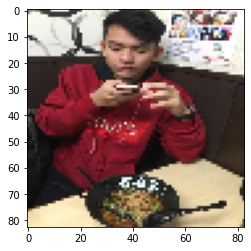

In [ ]:
first_img=train_data[0]
plt.imshow(first_img)
#the index of 1 shows what the actual labels are
print('the label is :',test_labels[0])

# Building the model

Convolutional layers

In [ ]:
generator=ImageDataGenerator(
  rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest"
)

We will be using transfer learning model for our model. Mobilenet is a light weight pretrained model with high accuracy.

In [ ]:
conv_layer=mobilenet.MobileNet(weights='imagenet',include_top=False,input_shape=(83,83,3))

In [ ]:
Model=Sequential()

Model.add(conv_layer)

Model.add(Flatten())

Model.add(Dense(521,activation='relu'))
Model.add(Dropout(0.5))

Model.add(Dense(128,activation='relu'))
Model.add(Dropout(0.5))

Model.add(Dense(2,activation='sigmoid'))

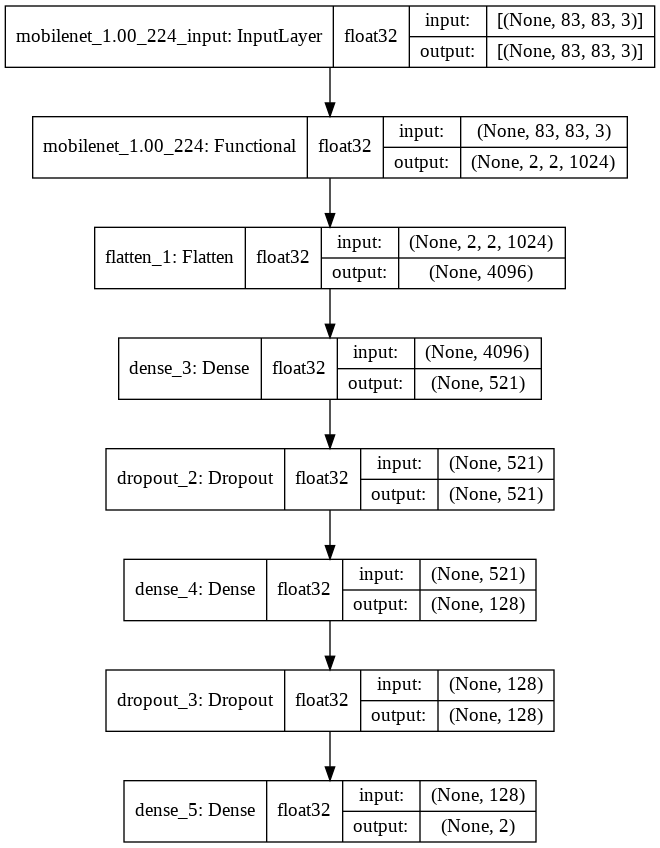

In [ ]:
plot_model(Model,show_dtype=True,show_layer_names=True,show_shapes=True)

In [ ]:
Model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
steps_per_epoch = len(train_data)//32
epochs=100

In [ ]:
Model.fit(generator.flow(train_data,train_labels),validation_data=(test_data,test_labels),epochs=epochs,steps_per_epoch=steps_per_epoch)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 1.9818 - accuracy: 0.4688 - val_loss: 0.8941 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 104ms/step - loss: 0.8497 - accuracy: 0.6250 - val_loss: 0.9433 - val_accuracy: 0.5500
Epoch 3/100
1/1 [==============================] - 0s 188ms/step - loss: 1.0457 - accuracy: 0.6562 - val_loss: 0.8632 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 108ms/step - loss: 1.8143 - accuracy: 0.6250 - val_loss: 0.7353 - val_accuracy: 0.5500
Epoch 5/100
1/1 [==============================] - 0s 186ms/step - loss: 1.0697 - accuracy: 0.7188 - val_loss: 0.5746 - val_accuracy: 0.8500
Epoch 6/100
1/1 [==============================] - 0s 120ms/step - loss: 1.0081 - accuracy: 0.7500 - val_loss: 0.7054 - val_accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 182ms/step - loss: 0.8295 - accuracy: 0.8438 - val_loss: 1.0003 - val_accuracy: 0.7000
Epoch 8/100
1/1 

# First model evaluation

In [ ]:
results=pd.DataFrame(Model.history.history)
results

,loss,accuracy,val_loss,val_accuracy
0,1.981813,0.46875,0.894057,0.50
1,0.849659,0.62500,0.943271,0.55
2,1.045692,0.65625,0.863227,0.50
3,1.814263,0.62500,0.735305,0.55
4,1.069684,0.71875,0.574559,0.85
...,...,...,...,...
95,0.013662,1.00000,0.456549,0.95
96,0.808254,0.87500,0.529007,0.95
97,0.086034,1.00000,0.623602,0.95
98,0.122851,1.00000,0.709219,0.90


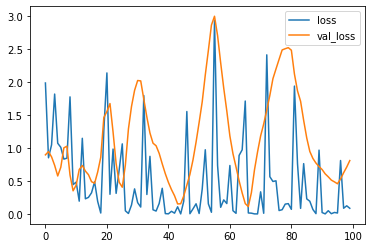

In [ ]:
results[['loss','val_loss']].plot()

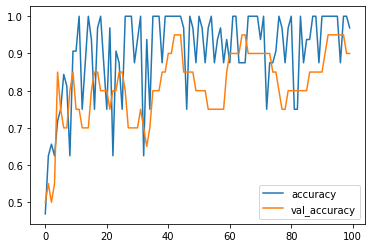

In [ ]:
results[['accuracy','val_accuracy']].plot()

Making predictions

In [ ]:
predictions=Model.predict(test_data)
predictions

array([[2.1274170e-07, 9.9996507e-01],
       [2.4478737e-02, 1.9273365e-01],
       [9.9998510e-01, 4.2744666e-08],
       [1.0000000e+00, 6.7384980e-11],
       [9.9697053e-01, 3.1186919e-05],
       [4.4941762e-01, 1.2055522e-02],
       [1.6829792e-01, 8.3032891e-02],
       [9.9990702e-01, 4.8889370e-07],
       [9.4348150e-01, 3.5956656e-04],
       [9.9999905e-01, 4.4454436e-09],
       [1.4987750e-22, 1.0000000e+00],
       [5.5790243e-21, 1.0000000e+00],
       [5.3532448e-32, 1.0000000e+00],
       [3.5204810e-09, 9.9999917e-01],
       [1.1065515e-25, 1.0000000e+00],
       [3.0278158e-15, 1.0000000e+00],
       [1.1659962e-15, 1.0000000e+00],
       [1.0596874e-11, 1.0000000e+00],
       [1.0803478e-09, 1.0000000e+00],
       [5.8543164e-06, 9.9990273e-01]], dtype=float32)

In [ ]:
predictions=[np.argmax(prediction) for prediction in predictions]
predictions

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
Test_labels=[]

for category in categories:
  #from the train folder,get the close/open directory
  path=os.path.join(test_folder,category)
  for img in os.listdir(path):
      img_path=os.path.join(path,img)
      #append the actual test labels
      Test_labels.append(category)


In [ ]:
Test_labels=lb.fit_transform(Test_labels)
Test_labels

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

Text(87.0, 0.5, 'Predictions')

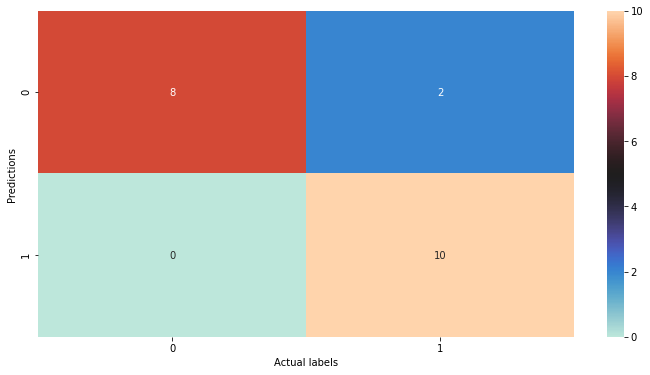

In [ ]:
cm=tf.math.confusion_matrix(labels=Test_labels,predictions=predictions)
cm

plt.figure(figsize=(12,6))
sns.heatmap(cm,annot=True,cmap='icefire',fmt='d')
plt.xlabel('Actual labels')
plt.ylabel('Predictions')

# Saving the model

In [ ]:
Model.save('second model.h5')